<a href="https://colab.research.google.com/github/J878-commits/-Task-1-Text-Summarization-with-Transformers-Gradio-/blob/main/neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Core Notebook Features

1. Setup

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


2. Load Images

In [2]:
def load_image(path, max_size=400):
    image = Image.open(path).convert('RGB')
    size = min(image.size)
    transform = transforms.Compose([
        transforms.Resize((max_size, max_size)),
        transforms.ToTensor()
    ])
    image = transform(image).unsqueeze(0)
    return image


3. Use Pretrained VGG19

In [3]:
from torchvision import models

vgg = models.vgg19(pretrained=True).features.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 114MB/s]


✅ Convert Tensor to Image

In [5]:
def im_convert(tensor):
    image = tensor.clone().detach().squeeze(0)
    image = image.cpu().clamp(0, 1)  # Ensure pixel values are in [0,1]
    image = transforms.ToPILImage()(image)
    return image


✅ Display the Result

In [9]:
from google.colab import files
uploaded = files.upload()





Saving Gemini_Generated_Image_pew1xqpew1xqpew1.png to Gemini_Generated_Image_pew1xqpew1xqpew1.png


4. Define Style and Content Loss
Use Gram matrices for style and MSE for content.

5. Optimization Loop
Use LBFGS or Adam to iteratively update the target image.

6. Save and Display Output

In [13]:
content_image = load_image("Gemini_Generated_Image_pew1xqpew1xqpew1.png")
style_image = load_image("Gemini_Generated_Image_pew1xqpew1xqpew1.png")  # same file




In [15]:
from PIL import Image

def load_image(path):
    return Image.open(path)

# Convert PNG to JPG if needed
png_path = "Gemini_Generated_Image_pew1xqpew1xqpew1.png"
jpg_path = "Gemini_Generated_Image_pew1xqpew1xqpew1.jpg"

# Check if JPG exists, else create it
try:
    style_image = load_image(jpg_path)
except FileNotFoundError:
    print("JPG not found. Converting PNG to JPG...")
    img = Image.open(png_path).convert("RGB")
    img.save(jpg_path)
    style_image = load_image(jpg_path)

# Load content image
content_image = load_image(png_path)



JPG not found. Converting PNG to JPG...


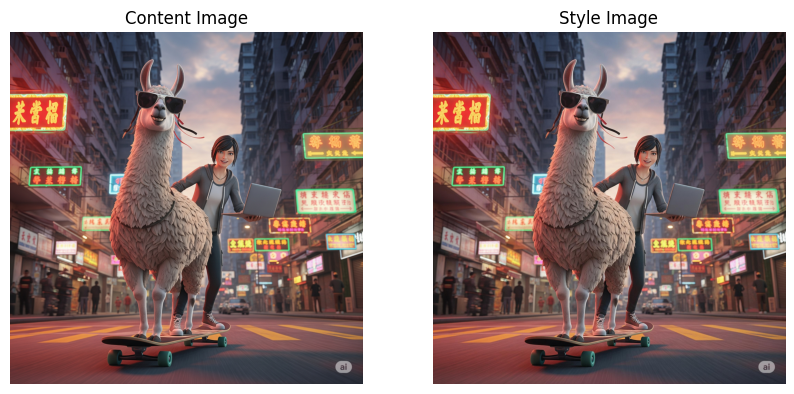

In [16]:
import matplotlib.pyplot as plt

# Display content and style images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Content Image")
plt.imshow(content_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Style Image")
plt.imshow(style_image)
plt.axis("off")

plt.show()
